In [1]:
! pip install matplotlib as plot

  Using cached matplotlib-3.4.2-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached as-0.1-py3-none-any.whl (2.2 kB)
  Using cached plot-0.6.5-py2.py3-none-any.whl (135 kB)
  Using cached kiwisolver-1.3.1-cp38-cp38-manylinux1_x86_64.whl (1.2 MB)
  Using cached Pillow-8.2.0-cp38-cp38-manylinux1_x86_64.whl (3.0 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached scipy-1.7.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)
  Using cached typing-3.7.4.3-py3-none-any.whl


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cleaning the Data

In [3]:
#import edu_data file
edu_data = pd.read_csv("education.csv")
edu_data

,city,state,region,race,grad_rate_midpt
0,ALBUQUERQUE,New Mexico,southwest,Total,73
1,ALBUQUERQUE,New Mexico,southwest,American Indian or Alaska Native,69
2,ALBUQUERQUE,New Mexico,southwest,Asian,75
3,ALBUQUERQUE,New Mexico,southwest,Black,90
4,ALBUQUERQUE,New Mexico,southwest,Hispanic,72
...,...,...,...,...,...
7839,Washington,District of Columbia,northeast,Asian,75
7840,Washington,District of Columbia,northeast,Black,97
7841,Washington,District of Columbia,northeast,Hispanic,77
7842,Washington,District of Columbia,northeast,Total,97


In [4]:
#drop all suppressed_data and NaN values, two or more races, and indigenous
#and change grad_rate_mdpt column name to grad_rate
edu_data = edu_data.loc[edu_data["grad_rate_midpt"] != "Suppressed data"]
edu_data = edu_data.loc[edu_data["race"] != "Two or more races"]
edu_data = edu_data.loc[edu_data["race"] != "American Indian or Alaska Native"]
edu_data = edu_data.loc[edu_data["race"] != "Total"]
edu_data = edu_data.dropna()
edu_data = edu_data.rename(columns={"grad_rate_midpt": "grad_rate"})
edu_data

,city,state,region,race,grad_rate
2,ALBUQUERQUE,New Mexico,southwest,Asian,75
3,ALBUQUERQUE,New Mexico,southwest,Black,90
4,ALBUQUERQUE,New Mexico,southwest,Hispanic,72
6,ALBUQUERQUE,New Mexico,southwest,White,77
9,ALBUQUERQUE,New Mexico,southwest,Asian,90
...,...,...,...,...,...
7837,Washington,District of Columbia,northeast,Hispanic,75
7839,Washington,District of Columbia,northeast,Asian,75
7840,Washington,District of Columbia,northeast,Black,97
7841,Washington,District of Columbia,northeast,Hispanic,77


In [5]:
edu_data["city"] = edu_data["city"].apply(str.lower)
edu_data["state"] = edu_data["state"].apply(str.lower)
edu_data["region"] = edu_data["region"].apply(str.lower)
edu_data

,city,state,region,race,grad_rate
2,albuquerque,new mexico,southwest,Asian,75
3,albuquerque,new mexico,southwest,Black,90
4,albuquerque,new mexico,southwest,Hispanic,72
6,albuquerque,new mexico,southwest,White,77
9,albuquerque,new mexico,southwest,Asian,90
...,...,...,...,...,...
7837,washington,district of columbia,northeast,Hispanic,75
7839,washington,district of columbia,northeast,Asian,75
7840,washington,district of columbia,northeast,Black,97
7841,washington,district of columbia,northeast,Hispanic,77


In [6]:
edu_data.dtypes

city         object
state        object
region       object
race         object
grad_rate    object
dtype: object

In [7]:
#change grad_rate data type into integer
edu_data = edu_data.astype({"grad_rate": int})
edu_data.dtypes

city         object
state        object
region       object
race         object
grad_rate     int64
dtype: object

In [8]:
city_data = edu_data.groupby(["region", "city", "race"]).mean("grad_rate")
city_data.head(10)

grad_rate
region  city     race               
midwest chicago  Asian     80.000000
                 Black     75.644737
                 Hispanic  74.235849
                 White     73.232558
        columbus Asian     66.250000
                 Black     78.692308
                 Hispanic  65.550000
                 White     75.347826
        detroit  Asian     85.000000
                 Black     79.904762

In [9]:
#group each city by the average graduation rate of each race
#edu_data = edu_data.groupby(["city", "race"]).agg({"grad_rate": ["mean"]})
#edu_data

In [10]:
#pivot table so the races are columns
city_data = pd.pivot_table(edu_data, values = "grad_rate", index = ["region", "city"], columns = "race")
city_data 

race                            Asian      Black   Hispanic      White
region    city                                                        
midwest   chicago           80.000000  75.644737  74.235849  73.232558
          columbus          66.250000  78.692308  65.550000  75.347826
          detroit           85.000000  79.904762  78.666667  72.000000
          indianapolis      85.444444  82.318182  80.681818  79.545455
          kansas city       83.500000  78.400000  78.153846  67.700000
          milwaukee         75.538462  70.562500  73.230769  74.466667
          omaha             75.750000  72.727273  76.538462  84.000000
northeast baltimore         84.000000  82.306122  71.413793  83.769231
          boston            79.916667  69.090909  67.333333  65.285714
          new york          81.586957  73.625000  74.941176  81.780488
          philadelphia      78.900000  71.446809  64.866667  62.961538
          washington        82.500000  75.411765  65.000000  87.333333
southeast atlanta           81.578947  82.750000  74.242424  85.857143
          charlotte         83.636364  86.066667  78.310345  81.555556
          jacksonville      83.400000  93.904762  88.294118  87.722222
          louisville        79.357143  87.200000  78.263158  86.050000
          memphis           75.571429  71.500000  64.647059  67.333333
          nashville         86.600000  73.782609  68.105263  72.956522
southwest albuquerque       77.000000  70.818182  70.400000  69.533333
          austin            91.727273  89.692308  96.148148  93.920000
          dallas            83.947368  85.571429  89.066667  83.120000
          el paso           82.500000  78.692308  90.218750  84.260870
          fort worth        86.882353  86.230769  91.689655  87.000000
          houston           90.662162  86.876190  87.198198  86.024096
          mesa              85.666667  75.416667  75.214286  79.357143
          oklahoma city     84.272727  76.565217  81.105263  70.450000
          phoenix           80.800000  78.384615  81.953488  81.100000
          san antonio       86.523810  86.774194  91.450000  88.970588
          tucson            77.142857  70.650000  76.733333  78.321429
west      colorado springs  77.333333  81.500000  83.550000  79.590909
          denver            78.666667  71.363636  78.638298  79.105263
          fresno            95.000000  85.812500  93.812500  87.375000
          las vegas         90.585366  84.682927  91.083333  91.104167
          los angeles       85.116279  79.803571  83.543689  74.133333
          portland          88.812500  76.400000  79.800000  87.727273
          sacramento        91.700000  85.517241  91.281250  89.064516
          san diego         89.024390  81.939394  90.604651  88.000000
          san francisco     92.800000  86.000000  80.100000  83.625000
          san jose          94.407407  80.250000  85.392857  88.074074
          seattle           89.357143  84.571429  82.200000  87.133333

In [11]:
city_data.describe()

race,Asian,Black,Hispanic,White
count,40.000000,40.000000,40.000000,40.000000
mean,83.711468,79.721174,79.841478,80.647198
std,6.029806,6.262715,8.792962,7.802980
min,66.250000,69.090909,64.647059,62.961538
25%,79.776786,75.004476,74.240780,74.383333
50%,83.791866,79.854167,79.233333,82.450244
75%,87.364890,85.530788,87.472178,87.183333
max,95.000000,93.904762,96.148148,93.920000


There's not a huge difference between races. About a 10% difference between 25% and 75% percentile which isn't huge. I wonder what this would look like in smaller or more rural areas. 

In [12]:
#round to whole number
city_data = city_data.round(decimals=0)
city_data

race                        Asian  Black  Hispanic  White
region    city                                           
midwest   chicago            80.0   76.0      74.0   73.0
          columbus           66.0   79.0      66.0   75.0
          detroit            85.0   80.0      79.0   72.0
          indianapolis       85.0   82.0      81.0   80.0
          kansas city        84.0   78.0      78.0   68.0
          milwaukee          76.0   71.0      73.0   74.0
          omaha              76.0   73.0      77.0   84.0
northeast baltimore          84.0   82.0      71.0   84.0
          boston             80.0   69.0      67.0   65.0
          new york           82.0   74.0      75.0   82.0
          philadelphia       79.0   71.0      65.0   63.0
          washington         82.0   75.0      65.0   87.0
southeast atlanta            82.0   83.0      74.0   86.0
          charlotte          84.0   86.0      78.0   82.0
          jacksonville       83.0   94.0      88.0   88.0
          louisville         79.0   87.0      78.0   86.0
          memphis            76.0   72.0      65.0   67.0
          nashville          87.0   74.0      68.0   73.0
southwest albuquerque        77.0   71.0      70.0   70.0
          austin             92.0   90.0      96.0   94.0
          dallas             84.0   86.0      89.0   83.0
          el paso            82.0   79.0      90.0   84.0
          fort worth         87.0   86.0      92.0   87.0
          houston            91.0   87.0      87.0   86.0
          mesa               86.0   75.0      75.0   79.0
          oklahoma city      84.0   77.0      81.0   70.0
          phoenix            81.0   78.0      82.0   81.0
          san antonio        87.0   87.0      91.0   89.0
          tucson             77.0   71.0      77.0   78.0
west      colorado springs   77.0   82.0      84.0   80.0
          denver             79.0   71.0      79.0   79.0
          fresno             95.0   86.0      94.0   87.0
          las vegas          91.0   85.0      91.0   91.0
          los angeles        85.0   80.0      84.0   74.0
          portland           89.0   76.0      80.0   88.0
          sacramento         92.0   86.0      91.0   89.0
          san diego          89.0   82.0      91.0   88.0
          san francisco      93.0   86.0      80.0   84.0
          san jose           94.0   80.0      85.0   88.0
          seattle            89.0   85.0      82.0   87.0

In [13]:
#resetting index so I can plot more easily 
city_data.reset_index(inplace=True)
city_data

race,region,city,Asian,Black,Hispanic,White
0,midwest,chicago,80.0,76.0,74.0,73.0
1,midwest,columbus,66.0,79.0,66.0,75.0
2,midwest,detroit,85.0,80.0,79.0,72.0
3,midwest,indianapolis,85.0,82.0,81.0,80.0
4,midwest,kansas city,84.0,78.0,78.0,68.0
5,midwest,milwaukee,76.0,71.0,73.0,74.0
6,midwest,omaha,76.0,73.0,77.0,84.0
7,northeast,baltimore,84.0,82.0,71.0,84.0
8,northeast,boston,80.0,69.0,67.0,65.0
9,northeast,new york,82.0,74.0,75.0,82.0


Text(0.5, 1.0, 'Side by Side Histogram of Graduation Rates')

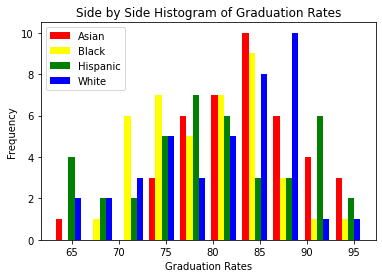

In [36]:
Asian = city_data["Asian"]
Black = city_data["Black"]
Hispanic = city_data["Hispanic"]
White = city_data["White"]

colors = ["red", "yellow", "green", "blue"]
names = ["Asian", "Black", "Hispanic", "White"]

plt.hist([Asian, Black, Hispanic, White], bins = 10, color = colors, label=names)

plt.legend()
plt.xlabel("Graduation Rates")
plt.ylabel("Frequency")
plt.title("Side by Side Histogram of Graduation Rates")

In this histogram, we can see that the highest concentration of 
graduation rates over 80% is seen in Asians and Whites. We see the frequency increase with graduation rates for Asians until about 85% when it begins to decrease. The lowest graduation rates are seen in Hispanics. We need to do more plotting to get a better idea of the distribution.

<AxesSubplot:ylabel='Frequency'>

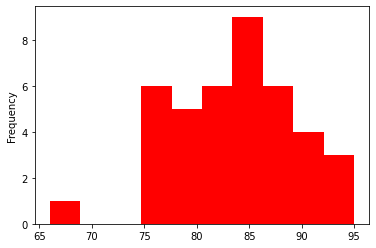

In [37]:
city_data["Asian"].plot(kind = "hist", bins = 10,  color = "red")

<AxesSubplot:ylabel='Frequency'>

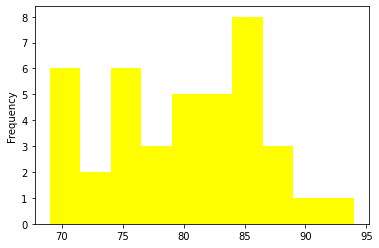

In [38]:
city_data["Black"].plot(kind = "hist", bins = 10,color = "yellow" )

<AxesSubplot:ylabel='Frequency'>

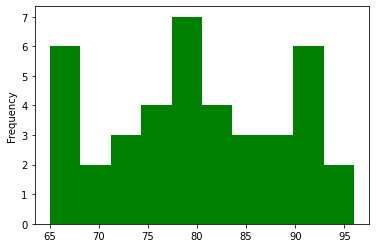

In [39]:
city_data["Hispanic"].plot(kind = "hist", bins = 10, color = "green")

# Plotting By City

Text(0.5, 1.0, 'Graduation Rates by Race')

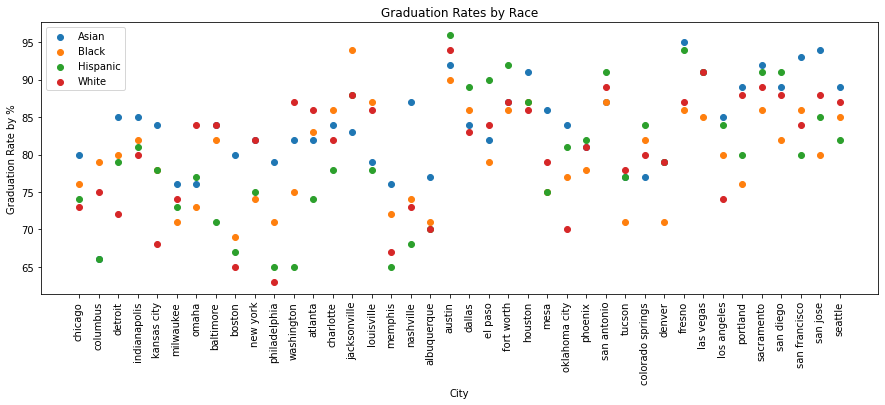

In [40]:
plt.figure(figsize=(15,5))
plt.scatter(x=city_data["city"],y = city_data["Asian"], label = "Asian")
plt.scatter(x=city_data["city"],y = city_data["Black"], label = "Black")
plt.scatter(x=city_data["city"],y = city_data["Hispanic"], label = "Hispanic")
plt.scatter(x=city_data["city"],y = city_data["White"], label = "White")
plt.legend()
plt.xlabel("City")
plt.ylabel("Graduation Rate by %")
plt.xticks(rotation=90)
plt.title("Graduation Rates by Race")

<AxesSubplot:xlabel='city'>

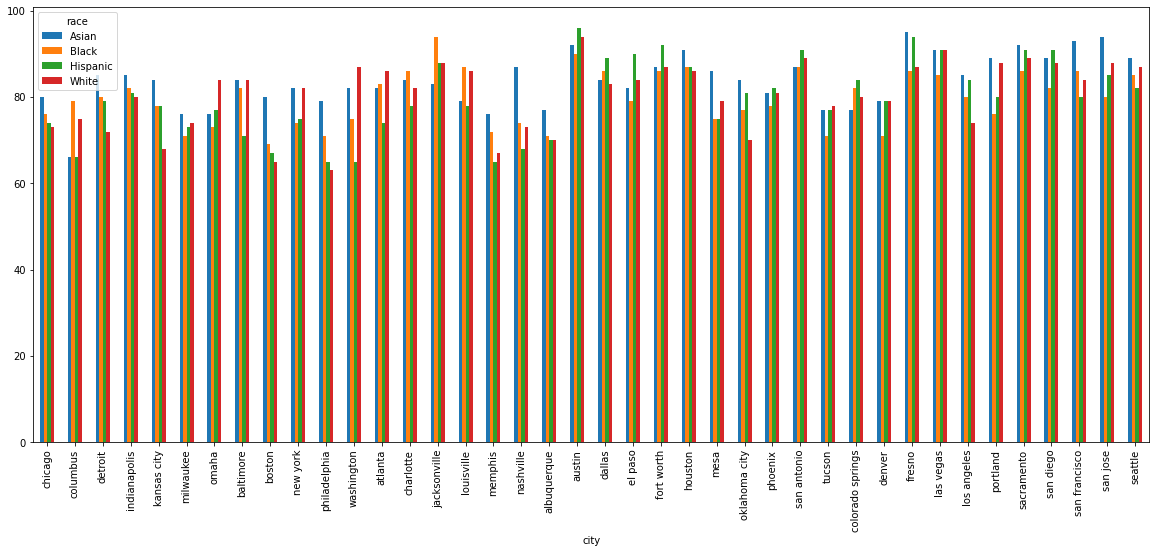

In [41]:
city_data.plot(x = "city", kind = "bar", figsize=(20,8))

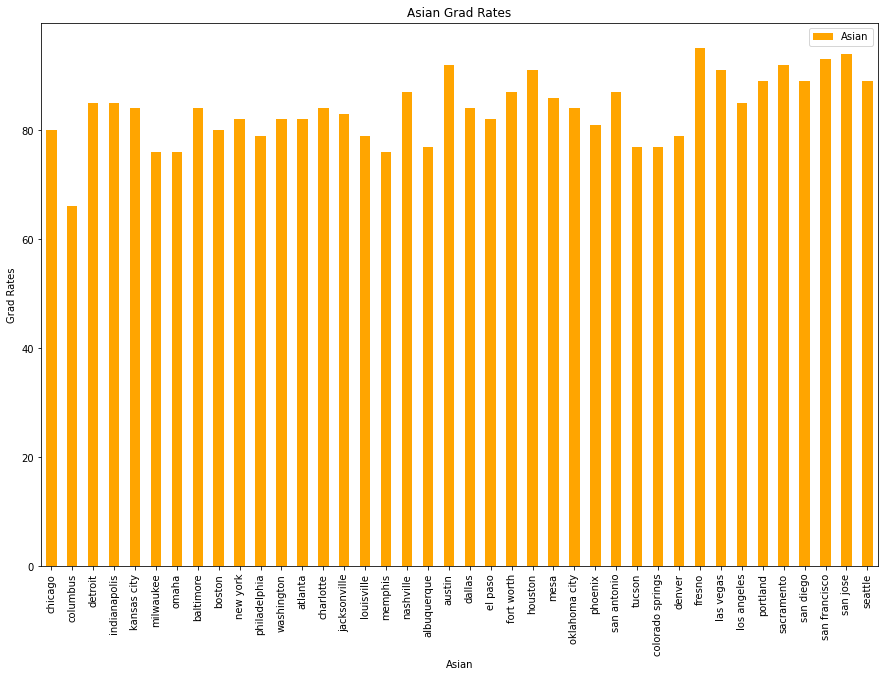

In [42]:
Asian_grad = city_data.plot(kind = "bar", x = "city", y = "Asian", figsize=(15,10),
                            xlabel = "Asian", ylabel = "Grad Rates", 
                            title = "Asian Grad Rates", color = "orange")

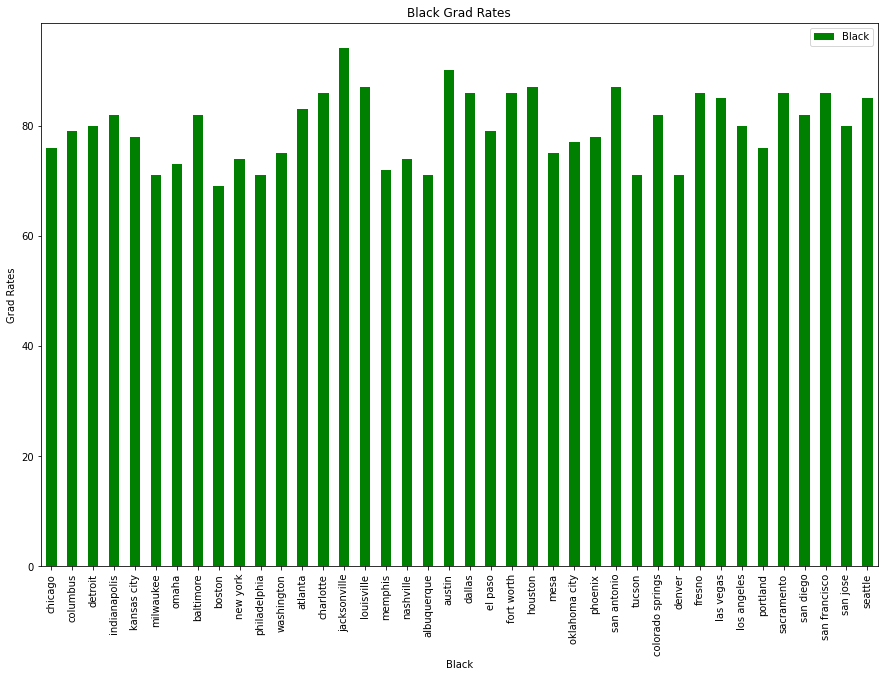

In [43]:
Black_grad = city_data.plot(kind = "bar", x="city", y = "Black", 
                            figsize=(15,10), xlabel = "Black", ylabel = "Grad Rates", 
                            title = "Black Grad Rates", color = "green")

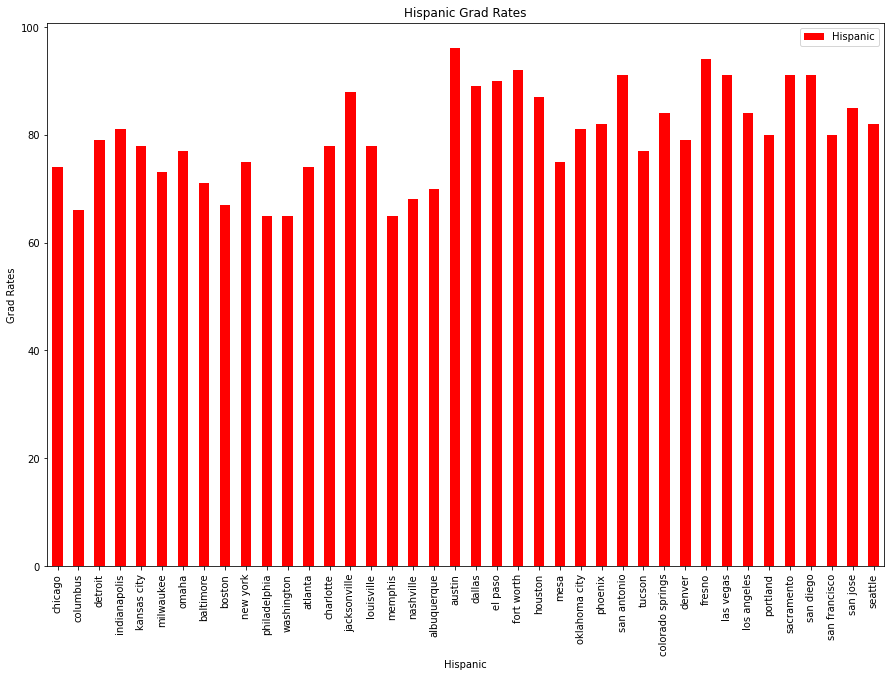

In [44]:
Hispanic_grad = city_data.plot(kind = "bar",x = "city", y = "Hispanic", 
                               figsize=(15,10), xlabel = "Hispanic", ylabel = "Grad Rates", 
                               title = "Hispanic Grad Rates", color = "red")

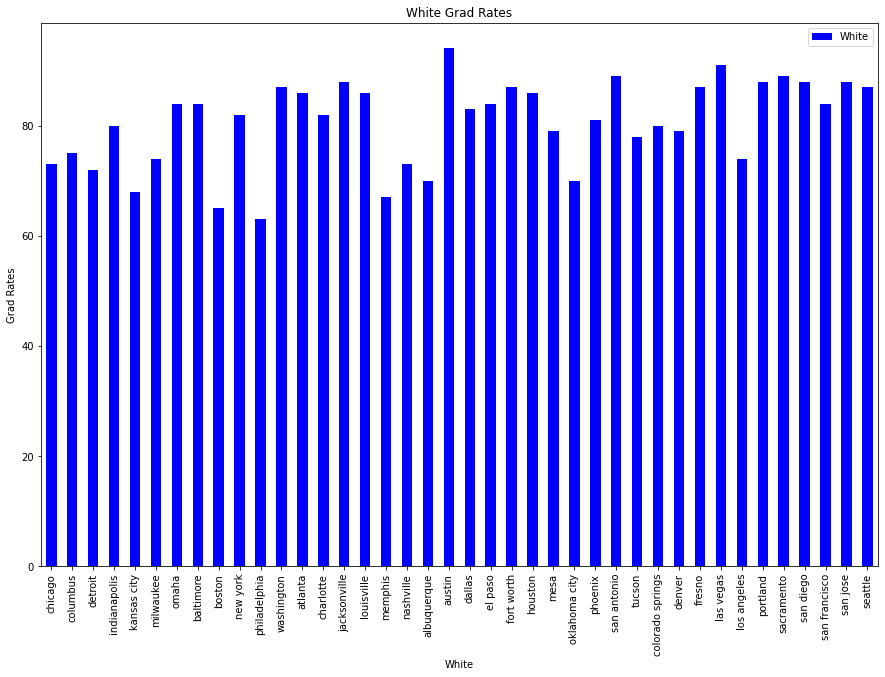

In [45]:
Whiite_grad = city_data.plot(kind = "bar",x = "city", y = "White", 
                               figsize=(15,10), xlabel = "White", ylabel = "Grad Rates", 
                               title = "White Grad Rates", color = "blue")

# Grouping by Region

In [46]:
city_data.set_index("region", inplace=True)

In [47]:
region_data = city_data.groupby(["region"]).mean("race")
region_data.reset_index(inplace=True)
region_data

race,region,Asian,Black,Hispanic,White
0,midwest,78.857143,77.000000,75.428571,75.142857
1,northeast,81.400000,74.200000,68.600000,76.200000
2,southeast,81.833333,82.666667,75.166667,80.333333
3,southwest,84.363636,80.636364,84.545455,81.909091
4,west,88.454545,81.727273,85.545455,85.000000


In [48]:
region_data.describe()

race,Asian,Black,Hispanic,White
count,5.000000,5.000000,5.000000,5.000000
mean,82.981732,79.246061,77.857229,79.717056
std,3.629541,3.546034,7.118198,4.073920
min,78.857143,74.200000,68.600000,75.142857
25%,81.400000,77.000000,75.166667,76.200000
50%,81.833333,80.636364,75.428571,80.333333
75%,84.363636,81.727273,84.545455,81.909091
max,88.454545,82.666667,85.545455,85.000000


<AxesSubplot:title={'center':'Grad Rates by Region'}, ylabel='Grad Rate'>

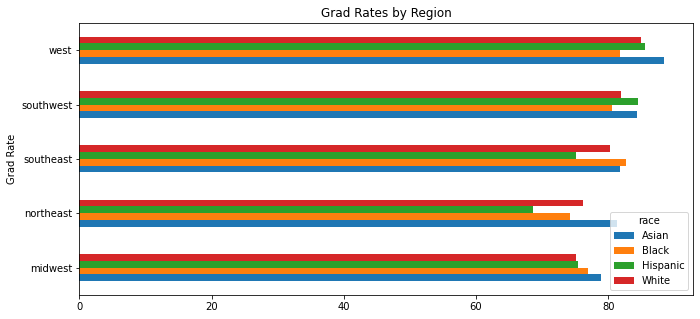

In [50]:
region_data.plot(x = "region", kind = "barh", figsize = (11,5), xlabel = "Grad Rate", ylabel = "Region", 
                               title = "Grad Rates by Region")

Based on this graph, we see that the highest graduation rates for Asians and Hispanics occurs in the West. And the highest graduation rates for Black people are in the southeast, but we'll have take a closer look at the cities in each of these regions to get a fuller understanding. 

In [51]:
#Breaking the dataframe down by region
west_region = city_data.loc["west"]
midwest_region = city_data.loc["midwest"]
southwest_region = city_data.loc["southwest"]
southeast_region = city_data.loc["southeast"]
northeast_region = city_data.loc["northeast"]
west_region

race,city,Asian,Black,Hispanic,White
region,,,,,
west,colorado springs,77.0,82.0,84.0,80.0
west,denver,79.0,71.0,79.0,79.0
west,fresno,95.0,86.0,94.0,87.0
west,las vegas,91.0,85.0,91.0,91.0
west,los angeles,85.0,80.0,84.0,74.0
west,portland,89.0,76.0,80.0,88.0
west,sacramento,92.0,86.0,91.0,89.0
west,san diego,89.0,82.0,91.0,88.0
west,san francisco,93.0,86.0,80.0,84.0


In [52]:
west_region.reset_index()
midwest_region.reset_index()
southwest_region.reset_index()
southeast_region.reset_index()
northeast_region.reset_index()

race,region,city,Asian,Black,Hispanic,White
0,northeast,baltimore,84.0,82.0,71.0,84.0
1,northeast,boston,80.0,69.0,67.0,65.0
2,northeast,new york,82.0,74.0,75.0,82.0
3,northeast,philadelphia,79.0,71.0,65.0,63.0
4,northeast,washington,82.0,75.0,65.0,87.0


race,city,Asian,Black,Hispanic,White
region,,,,,
west,colorado springs,77.0,82.0,84.0,80.0
west,denver,79.0,71.0,79.0,79.0
west,fresno,95.0,86.0,94.0,87.0
west,las vegas,91.0,85.0,91.0,91.0
west,los angeles,85.0,80.0,84.0,74.0
west,portland,89.0,76.0,80.0,88.0
west,sacramento,92.0,86.0,91.0,89.0
west,san diego,89.0,82.0,91.0,88.0
west,san francisco,93.0,86.0,80.0,84.0


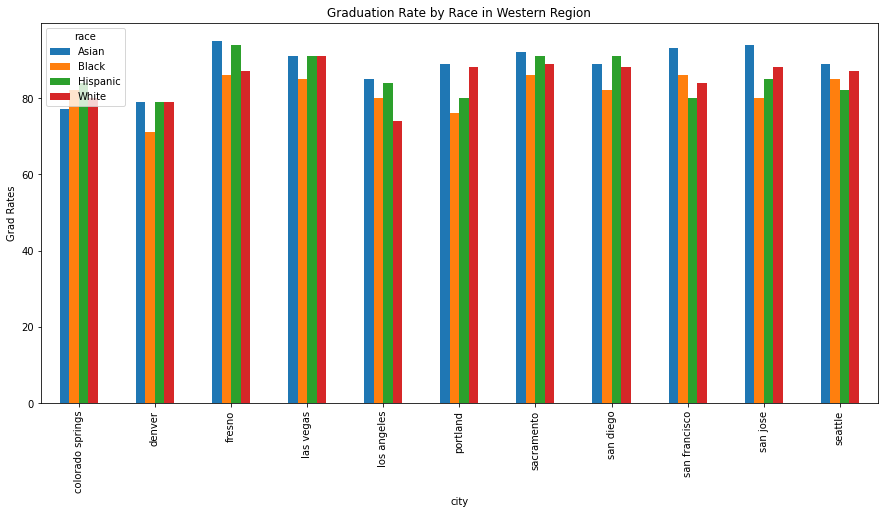

In [54]:
west_region.plot(x = "city", kind = "bar", xlabel = "city", ylabel = "Grad Rates", 
                 figsize =(15,7), title = "Graduation Rate by Race in Western Region")
west_region

In [55]:
west_region.describe

<bound method NDFrame.describe of race                city  Asian  Black  Hispanic  White
region                                                 
west    colorado springs   77.0   82.0      84.0   80.0
west              denver   79.0   71.0      79.0   79.0
west              fresno   95.0   86.0      94.0   87.0
west           las vegas   91.0   85.0      91.0   91.0
west         los angeles   85.0   80.0      84.0   74.0
west            portland   89.0   76.0      80.0   88.0
west          sacramento   92.0   86.0      91.0   89.0
west           san diego   89.0   82.0      91.0   88.0
west       san francisco   93.0   86.0      80.0   84.0
west            san jose   94.0   80.0      85.0   88.0
west             seattle   89.0   85.0      82.0   87.0>

In the west, all minorites, Fresno has the highest graduation rates in the West. For Black people, it's a tie between Fresno, Sacramento and San Francisco.

race,city,Asian,Black,Hispanic,White
region,,,,,
midwest,chicago,80.0,76.0,74.0,73.0
midwest,columbus,66.0,79.0,66.0,75.0
midwest,detroit,85.0,80.0,79.0,72.0
midwest,indianapolis,85.0,82.0,81.0,80.0
midwest,kansas city,84.0,78.0,78.0,68.0
midwest,milwaukee,76.0,71.0,73.0,74.0
midwest,omaha,76.0,73.0,77.0,84.0


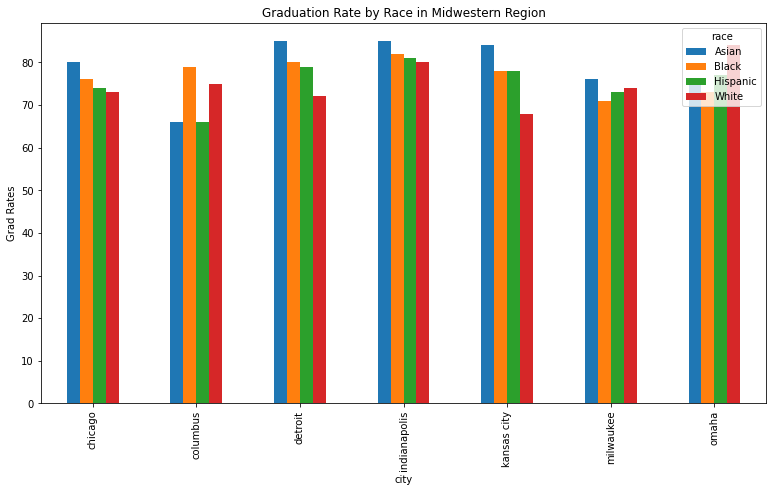

In [56]:
midwest_region.plot(x = "city", kind = "bar", xlabel = "city", ylabel = "Grad Rates", 
                 figsize =(13,7), title = "Graduation Rate by Race in Midwestern Region")
midwest_region

In the midwest, Indianapolis has the highest grad rates for the three minorites. For Asians, it's a tie between Indianoplois and Detroit. 

race,city,Asian,Black,Hispanic,White
region,,,,,
southwest,albuquerque,77.0,71.0,70.0,70.0
southwest,austin,92.0,90.0,96.0,94.0
southwest,dallas,84.0,86.0,89.0,83.0
southwest,el paso,82.0,79.0,90.0,84.0
southwest,fort worth,87.0,86.0,92.0,87.0
southwest,houston,91.0,87.0,87.0,86.0
southwest,mesa,86.0,75.0,75.0,79.0
southwest,oklahoma city,84.0,77.0,81.0,70.0
southwest,phoenix,81.0,78.0,82.0,81.0


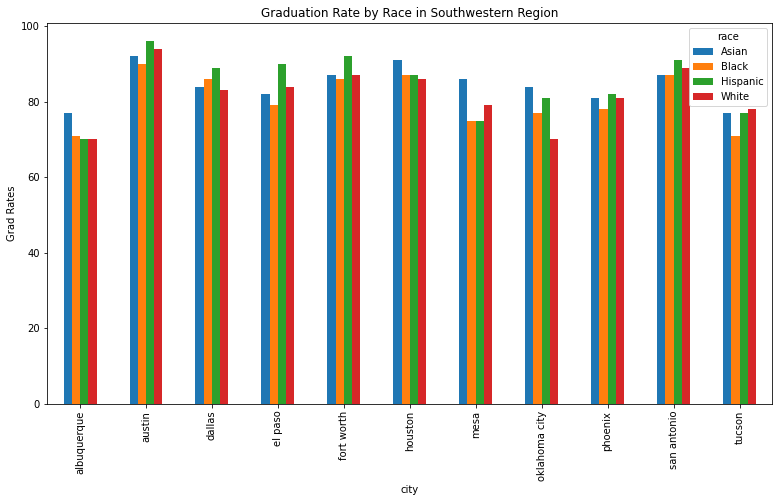

In [58]:
southwest_region.plot(x = "city", kind = "bar", xlabel = "city", ylabel = "Grad Rates", 
                 figsize =(13,7), title = "Graduation Rate by Race in Southwestern Region")
southwest_region

In the southwest, Austin Texas has the highest graduation rates.

race,city,Asian,Black,Hispanic,White
region,,,,,
southeast,atlanta,82.0,83.0,74.0,86.0
southeast,charlotte,84.0,86.0,78.0,82.0
southeast,jacksonville,83.0,94.0,88.0,88.0
southeast,louisville,79.0,87.0,78.0,86.0
southeast,memphis,76.0,72.0,65.0,67.0
southeast,nashville,87.0,74.0,68.0,73.0


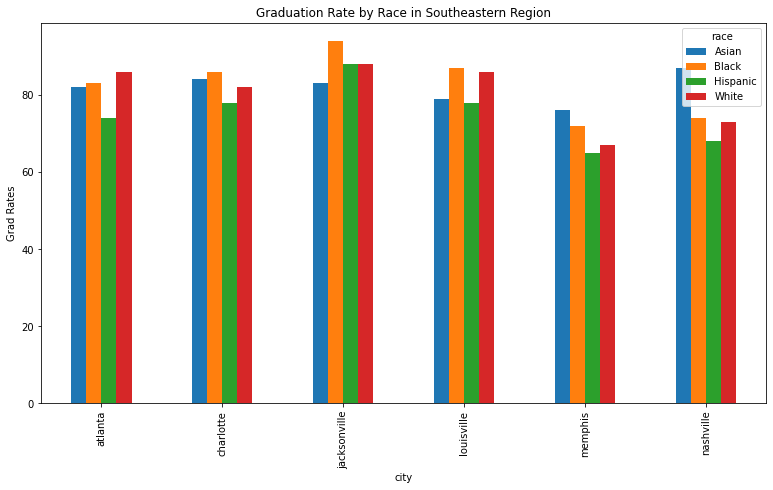

In [59]:
southeast_region.plot(x = "city", kind = "bar", xlabel = "city", ylabel = "Grad Rates", 
                 figsize =(13,7), title = "Graduation Rate by Race in Southeastern Region")
southeast_region

Charlotte has highest graduation rate for Asians, Jacksonville has highest graduation rate for Blacks and Hispanics.

race,city,Asian,Black,Hispanic,White
region,,,,,
northeast,baltimore,84.0,82.0,71.0,84.0
northeast,boston,80.0,69.0,67.0,65.0
northeast,new york,82.0,74.0,75.0,82.0
northeast,philadelphia,79.0,71.0,65.0,63.0
northeast,washington,82.0,75.0,65.0,87.0


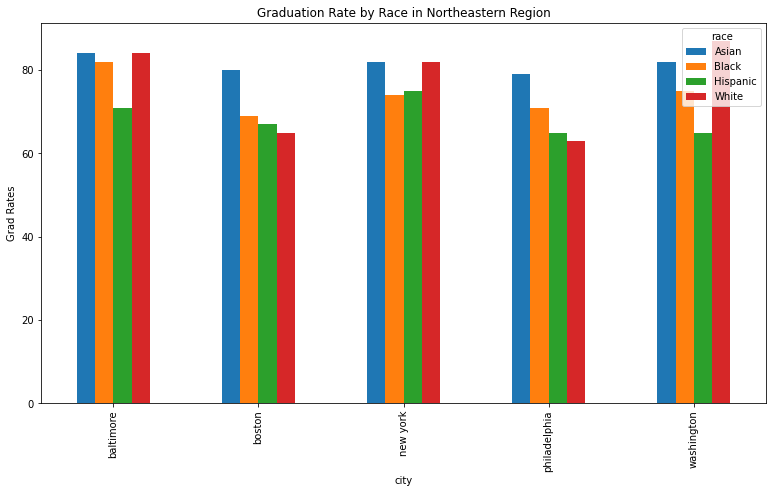

In [60]:
northeast_region.plot(x = "city", kind = "bar", xlabel = "city", ylabel = "Grad Rates", 
                 figsize =(13,7), title = "Graduation Rate by Race in Northeastern Region")
northeast_region

Northeast has most differences in grad rates between minorities. Baltimore is highest for Asians and Blacks, and New York is highest for Hispanics. 

Fresno, Indianapolis, Austin, Charlotte, Jacksonville, Baltimore and New York have highest in all regions

In [61]:
#top_cities = city_data[city_data.city == "fresno"]
top_cities = city_data.loc[city_data["city"].isin(["fresno", "austin", "indianapolis", "charlotte",
                                                   "jacksonville", "baltimore", "new york"])]
top_cities

race,city,Asian,Black,Hispanic,White
region,,,,,
midwest,indianapolis,85.0,82.0,81.0,80.0
northeast,baltimore,84.0,82.0,71.0,84.0
northeast,new york,82.0,74.0,75.0,82.0
southeast,charlotte,84.0,86.0,78.0,82.0
southeast,jacksonville,83.0,94.0,88.0,88.0
southwest,austin,92.0,90.0,96.0,94.0
west,fresno,95.0,86.0,94.0,87.0


<AxesSubplot:title={'center':'Graduation Rate by Race in Top Cities'}, xlabel='city', ylabel='Grad Rates'>

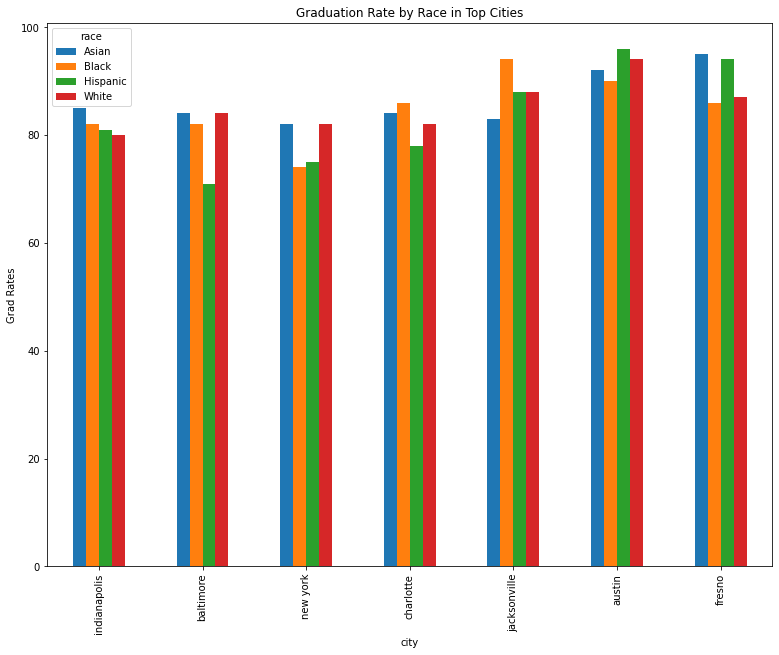

In [62]:
top_cities.plot(x = "city", kind = "bar", xlabel = "city", ylabel = "Grad Rates", 
                 figsize =(13,10), title = "Graduation Rate by Race in Top Cities")

Based on graduaton rates, Jacksonville (Southeast) is the best for Black people, Fresno (West) is the best for Asian people, and Austin (Southwest) is the best for Hispanic people. We said earlier, that based on the regionally grouped graph, we see that the highest graduation rates for Asians and Hispanics occurs in the West. And the highest graduation rates for Black people are in the southeast. Our findings show that this is mostly true, only that the best city for Hispanic graduation rates is in the Southwest.